In [2]:
!pip install ucimlrepo

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from ucimlrepo import fetch_ucirepo








In [4]:
# fetch dataset
initial_ds = fetch_ucirepo(id=697)


In [5]:
# data (as pandas dataframes)
X = initial_ds.data.features.copy()
y = initial_ds.data.targets.copy()

In [6]:
y

,Target
0,Dropout
1,Graduate
2,Dropout
3,Graduate
4,Graduate
...,...
4419,Graduate
4420,Dropout
4421,Dropout
4422,Graduate


In [7]:
# examine datatypes
X.dtypes



,0
Marital Status,int64
Application mode,int64
Application order,int64
Course,int64
Daytime/evening attendance,int64
Previous qualification,int64
Previous qualification (grade),float64
Nacionality,int64
Mother's qualification,int64
Father's qualification,int64


In [8]:
    y['Target'] = y['Target'].replace({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})

    y['Target'].astype(int, copy=True)



<ipython-input-8-2a62f1028d77>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y['Target'] = y['Target'].replace({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})


,Target
0,0
1,2
2,0
3,2
4,2
...,...
4419,2
4420,0
4421,0
4422,2


In [9]:
#Split into train and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
y_train.tail(10)

,Target
769,2
1685,2
130,0
2919,0
3171,0
3444,0
466,1
3092,2
3772,2
860,0


In [11]:
X_train.corrwith(y_train['Target'])

,0
Marital Status,-0.076000
Application mode,-0.211949
Application order,0.082269
Course,0.044949
Daytime/evening attendance,0.078642
Previous qualification,-0.046026
Previous qualification (grade),0.101288
Nacionality,-0.012565
Mother's qualification,-0.045302
Father's qualification,-0.006898


In [75]:
print(X_train['Curricular units 1st sem (grade)'])
print(y_train)


3383     0.000000
2840    11.666667
564     14.166667
1786     0.000000
3900    13.900000
          ...    
3444    11.714286
466     14.333333
3092    14.166667
3772    13.500000
860     12.600000
Name: Curricular units 1st sem (grade), Length: 3539, dtype: float64
      Target
3383       0
2840       1
564        2
1786       0
3900       2
...      ...
3444       0
466        1
3092       2
3772       2
860        0

[3539 rows x 1 columns]


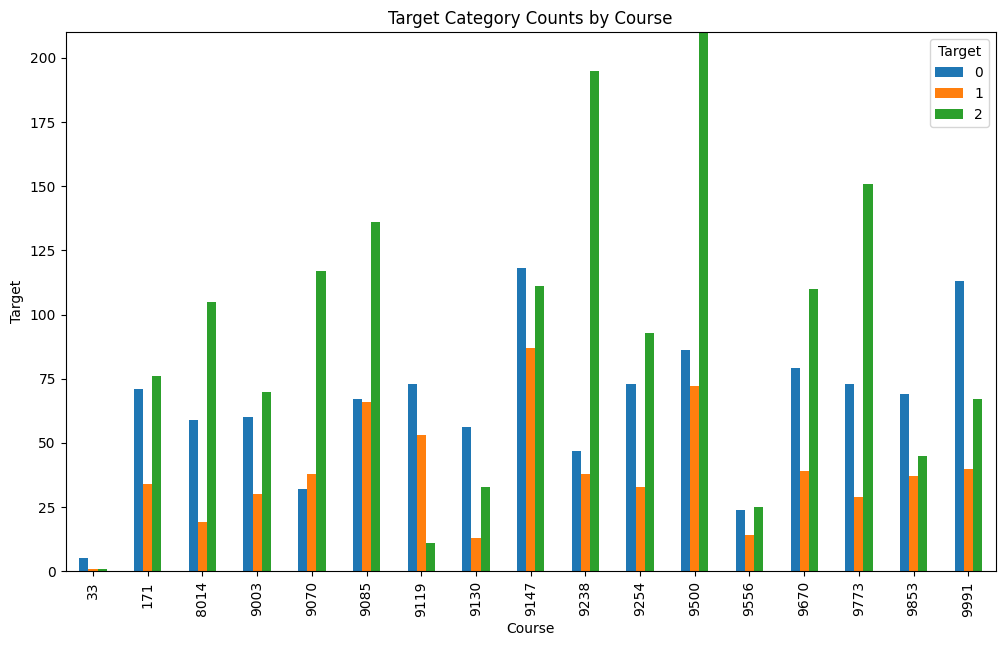

In [155]:
# Doing EDA on categorical data that will not show a numerical correlation

categories = X_train['Course'].unique() # Get unique course values
# Calculate the count of each target category for each course
Graduates = y_train.groupby(X_train['Course'])['Target'].value_counts().unstack ()


# Create a bar plot for each target category
categories = X_train['Course'].unique() # Get unique course values
# Calculate the count of each target category for each course
Graduates = y_train.groupby(X_train['Course'])['Target'].value_counts().unstack()


Graduates.plot(kind='bar', figsize=(12, 7))

plt.xlabel('Course')
plt.ylabel('Target')
plt.title('Target Category Counts by Course')
plt.legend(title='Target')
plt.ylim(0, 210)
plt.show()



In [36]:
# Calculate the percentage of each target category for each course
Graduates_percent = Graduates.div(Graduates.sum(axis=1), axis=0)

Graduates_percent.head(17)

Target,0,1,2
Course,,,
33,0.714286,0.142857,0.142857
171,0.392265,0.187845,0.419890
8014,0.322404,0.103825,0.573770
9003,0.375000,0.187500,0.437500
9070,0.171123,0.203209,0.625668
9085,0.249071,0.245353,0.505576
9119,0.532847,0.386861,0.080292
9130,0.549020,0.127451,0.323529
9147,0.373418,0.275316,0.351266


In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#Creating decision tree
grad_clf = DecisionTreeClassifier

#Creating dictionary for Grid Search
hypers = {
  "max_features" : (3, 4, 5, 6, 7, 8),
  "max_depth" : (1, 2, 3, 4, 5, 6, 7, 8),
  "min_samples_split" : (20, 30, 40, 50, 75, 100),
  "max_leaf_nodes" : (17, 18, 19, 20, 21, 22, 25, 30)
}

#Using GridSearchCV to determine the best hyperparameters
GS = GridSearchCV(estimator=grad_clf(), param_grid=hypers)
GS.fit(X_train, y_train)

print(GS.best_params_)

{'max_depth': 7, 'max_features': 8, 'max_leaf_nodes': 22, 'min_samples_split': 20}


In [105]:
#Creating decision tree using the selected "best" hyperparameters
grad_clf_best = DecisionTreeClassifier(max_features=8, max_depth=7, max_leaf_nodes=22, min_samples_split=20)

#Running the decision tree on training set
grad_clf_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_features=8, max_leaf_nodes=22,
                       min_samples_split=20)

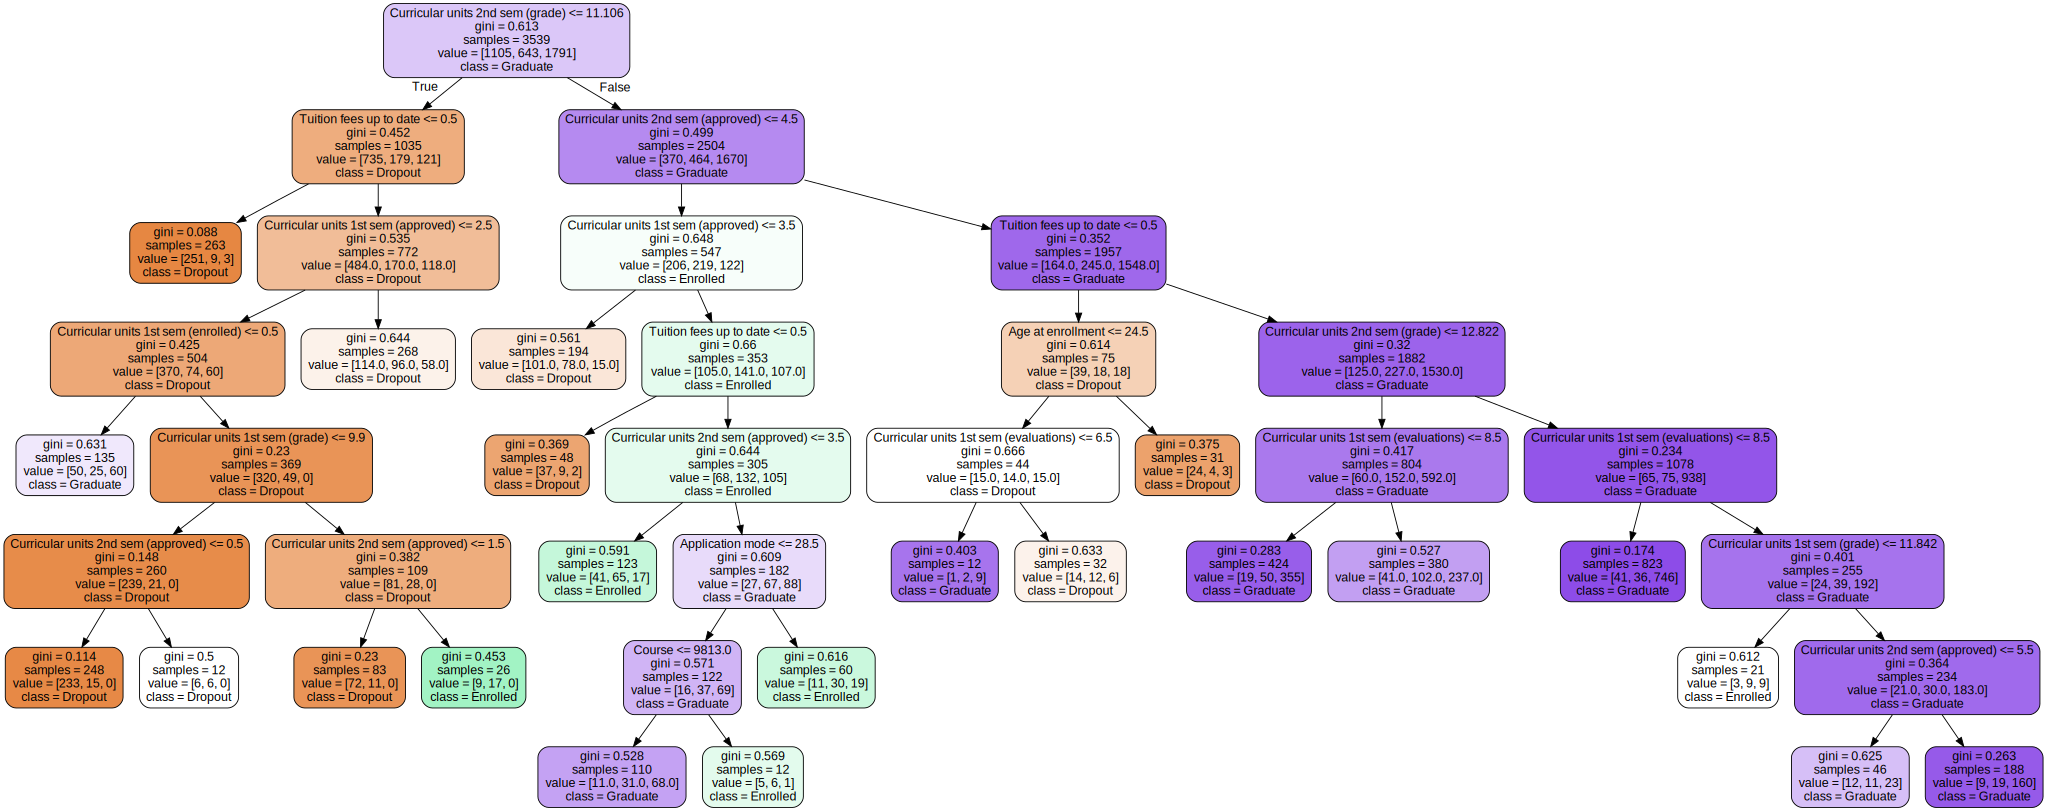

In [106]:
from sklearn.tree import export_graphviz

export_graphviz(
        grad_clf_best,
        out_file="grad_tree.dot",
        feature_names=X.columns,
        class_names=['Dropout', 'Enrolled', 'Graduate'],
        rounded=True,
        filled=True
)

from graphviz import Source

Source.from_file("grad_tree.dot")

In [107]:
from sklearn.metrics import accuracy_score

y_pred = grad_clf_best.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.7141242937853107


In [111]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

y_train.shape


rnd_clf = RandomForestClassifier(n_estimators=1000, max_features=5, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_rf))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.7740112994350282


Random Forest generated a 77% accuracy score


In [112]:
importances = rnd_clf.feature_importances_

for i, importance in enumerate(importances):
    print(f"Feature {i+1}: {importance}")

Feature 1: 0.003899040341873962
Feature 2: 0.02146003778493464
Feature 3: 0.015200160698906477
Feature 4: 0.03315154318392878
Feature 5: 0.0030658611625427852
Feature 6: 0.006421201736500581
Feature 7: 0.0377315007263923
Feature 8: 0.0023112842676100277
Feature 9: 0.021305795465413235
Feature 10: 0.021898404864823705
Feature 11: 0.026272076996035783
Feature 12: 0.028952468303021964
Feature 13: 0.042386403793033
Feature 14: 0.008053937455776827
Feature 15: 0.0011472327647975493
Feature 16: 0.011651268692941823
Feature 17: 0.039818557523232934
Feature 18: 0.010003668085785114
Feature 19: 0.01634953467383679
Feature 20: 0.03628227300780994
Feature 21: 0.0015381605302165538
Feature 22: 0.006841964394937336
Feature 23: 0.019561589863736604
Feature 24: 0.03752230517874617
Feature 25: 0.08914845666308771
Feature 26: 0.06895967614543491
Feature 27: 0.005122806056515816
Feature 28: 0.005647272408286802
Feature 29: 0.021588314662113233
Feature 30: 0.04343631742364854
Feature 31: 0.14594742174251

Most important features (in order of importance):
1) 2nd semester number of courses passed (12%, 10%)
2) 2nd semester GPA (9%, 13%)
3) 1st semester number of courses passed (9%, 9%)
4) 1st semester GPA (7%, 7%)

Next highest is 4%: These include Previous Qualification grade (though previous qualification type was nearly non-existent in importance), Admission grade, Age at enrollment, and whether tuition payments were up to date.

Previous Qualification grade and Admission grade both showed minimal correlation, while Age showed a -23% correlation and tuition payments showed a 41% correlation.

Features of Debtor, Gender, and Scholarship recipient did not have a strong feature importance, although they showed a 20-30% correlation.

In [44]:
# Get column names with index
column_names = list(enumerate(X_train.columns))


# Print the numbered list of column names
print(column_names)

[(0, 'Marital Status'), (1, 'Application mode'), (2, 'Application order'), (3, 'Course'), (4, 'Daytime/evening attendance'), (5, 'Previous qualification'), (6, 'Previous qualification (grade)'), (7, 'Nacionality'), (8, "Mother's qualification"), (9, "Father's qualification"), (10, "Mother's occupation"), (11, "Father's occupation"), (12, 'Admission grade'), (13, 'Displaced'), (14, 'Educational special needs'), (15, 'Debtor'), (16, 'Tuition fees up to date'), (17, 'Gender'), (18, 'Scholarship holder'), (19, 'Age at enrollment'), (20, 'International'), (21, 'Curricular units 1st sem (credited)'), (22, 'Curricular units 1st sem (enrolled)'), (23, 'Curricular units 1st sem (evaluations)'), (24, 'Curricular units 1st sem (approved)'), (25, 'Curricular units 1st sem (grade)'), (26, 'Curricular units 1st sem (without evaluations)'), (27, 'Curricular units 2nd sem (credited)'), (28, 'Curricular units 2nd sem (enrolled)'), (29, 'Curricular units 2nd sem (evaluations)'), (30, 'Curricular units 2

In [126]:
#Removing features from 1st and 2nd semester to see if we can predict
#likelihood of dropout before classes begin

after_enroll_feats = [16, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

pre_admit_features_train = X_train.drop(X_train.columns[after_enroll_feats],axis=1)

pre_admit_features_test = X_test.drop(X_test.columns[after_enroll_feats],axis=1)


In [128]:
#Running random forest using only pre-admit features

rnd_clf_pre = RandomForestClassifier(n_estimators=1000, max_features=5, n_jobs=-1)
rnd_clf_pre.fit(pre_admit_features_train, y_train)

y_pred_rf_pre = rnd_clf_pre.predict(pre_admit_features_test)

print(accuracy_score(y_test, y_pred_rf_pre))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.6259887005649718


Pre-admit features generated a 65% accurary score.

In [129]:
importances_pre = rnd_clf_pre.feature_importances_

for i, importance in enumerate(importances_pre):
    print(f"Feature {i+1}: {importance}")

Feature 1: 0.011221572063266582
Feature 2: 0.04980294854339872
Feature 3: 0.033183058098458784
Feature 4: 0.08923824208314726
Feature 5: 0.007317030254945366
Feature 6: 0.016396041273497877
Feature 7: 0.09565367013078682
Feature 8: 0.004133053054243009
Feature 9: 0.05131896216300238
Feature 10: 0.05096170711925584
Feature 11: 0.06415093952124373
Feature 12: 0.07468090157960305
Feature 13: 0.11513282651863092
Feature 14: 0.020612122087673372
Feature 15: 0.002742752836592048
Feature 16: 0.0304807430464583
Feature 17: 0.024228268673625823
Feature 18: 0.04657316460357413
Feature 19: 0.09464396691262764
Feature 20: 0.002823601569613608
Feature 21: 0.054509573982823044
Feature 22: 0.060194853883531546


Course = 8%
Previous Qual (Grade) = 9%, and Admission Grade = 11%
Father's occupation = 7%, Mother's Occupation = 6%, Mother's and Father's income = 5%
13: Admission Grade = 11%
17: Tuition Current = 8%
20: Age = 8%

Overall economic effects--GDP and Inflation rate had a 6% and 5% importance, respectively, while the unemployment rate had no importance (0%)

In [131]:
# Running a random forest using only a single pre-admit feature to see if we
# can identify which are most important

rnd_clf_single = RandomForestClassifier(n_estimators=1000, max_features=1, n_jobs=-1)

rnd_clf_single.fit(pre_admit_features_train, y_train)

y_pred_rf_single = rnd_clf_single.predict(pre_admit_features_test)

print(accuracy_score(y_test, y_pred_rf_single))

importances_single = rnd_clf_single.feature_importances_

for i, importance in enumerate(importances_single):
    print(f"Feature {i+1}: {importance}")

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.6045197740112994
Feature 1: 0.014124486380875222
Feature 2: 0.05727049149191668
Feature 3: 0.03536366419801536
Feature 4: 0.08536876343485651
Feature 5: 0.009381448644555822
Feature 6: 0.021326503386467632
Feature 7: 0.09383429029281866
Feature 8: 0.004496224456830683
Feature 9: 0.05570252958507063
Feature 10: 0.05599100117924942
Feature 11: 0.06831925567643031
Feature 12: 0.07751257460260196
Feature 13: 0.10336020009388713
Feature 14: 0.018903385293733827
Feature 15: 0.0028208865792034112
Feature 16: 0.02815173478160767
Feature 17: 0.028863022337097848
Feature 18: 0.037742001609735884
Feature 19: 0.0883465512595183
Feature 20: 0.0029886410158155665
Feature 21: 0.05359483187172502
Feature 22: 0.05653751182798666


In [132]:
# Single feature again, but using all features

rnd_clf_single_all = RandomForestClassifier(n_estimators=1000, max_features=1, n_jobs=-1)

rnd_clf_single_all.fit(X_train, y_train)

y_pred_rf_single_all = rnd_clf_single_all.predict(X_test)

print(accuracy_score(y_test, y_pred_rf_single_all))

importances_single_all = rnd_clf_single_all.feature_importances_

for i, importance in enumerate(importances_single_all):
    print(f"Feature {i+1}: {importance}")

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.7604519774011299
Feature 1: 0.006939478363760747
Feature 2: 0.028512883075597805
Feature 3: 0.01790083437562273
Feature 4: 0.03379606267066093
Feature 5: 0.005249255786499517
Feature 6: 0.010300802532448703
Feature 7: 0.04127166013695232
Feature 8: 0.0028881737640567774
Feature 9: 0.02706980516596559
Feature 10: 0.027016215638065902
Feature 11: 0.0315881394181489
Feature 12: 0.03472583030760626
Feature 13: 0.04477668778067553
Feature 14: 0.011028520540603132
Feature 15: 0.0016322745131277724
Feature 16: 0.014793360622500945
Feature 17: 0.02910905018554594
Feature 18: 0.015114345961615348
Feature 19: 0.01931674303660237
Feature 20: 0.040128629736213305
Feature 21: 0.0020707962920968187
Feature 22: 0.009522579682016502
Feature 23: 0.023874791184423795
Feature 24: 0.043732197905461866
Feature 25: 0.07552453999763929
Feature 26: 0.06318301356668733
Feature 27: 0.007065948916039303
Feature 28: 0.007963899580405645
Feature 29: 0.02471442655757685
Feature 30: 0.04693939461032247
Feature 31:

In [81]:
#Trying a classifier

#Creating numpy arrays
X_train_values = X_train.values
y_train_values = y_train.values
X_test_values = X_test.values
y_test_values = y_test.values

arr_y_train_values = y_train_values.ravel()
arr_y_test_values = y_test_values.ravel()

X_train_values.shape

y_train_grad = (arr_y_train_values == 2)
y_test_grad = (arr_y_test_values == 2)

(3539, 36)

In [79]:


from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_values, y_train_grad)


random_row = X_train_values[3537]
random_row = random_row.reshape(1, -1)

sgd_clf.predict(random_row)

array([False])

The binary classifier doesn't seem to work very well.

In [142]:
from sklearn.linear_model import LinearRegression

new = X_train[['Curricular units 1st sem (grade)']]
reg = LinearRegression().fit(new, y_train)



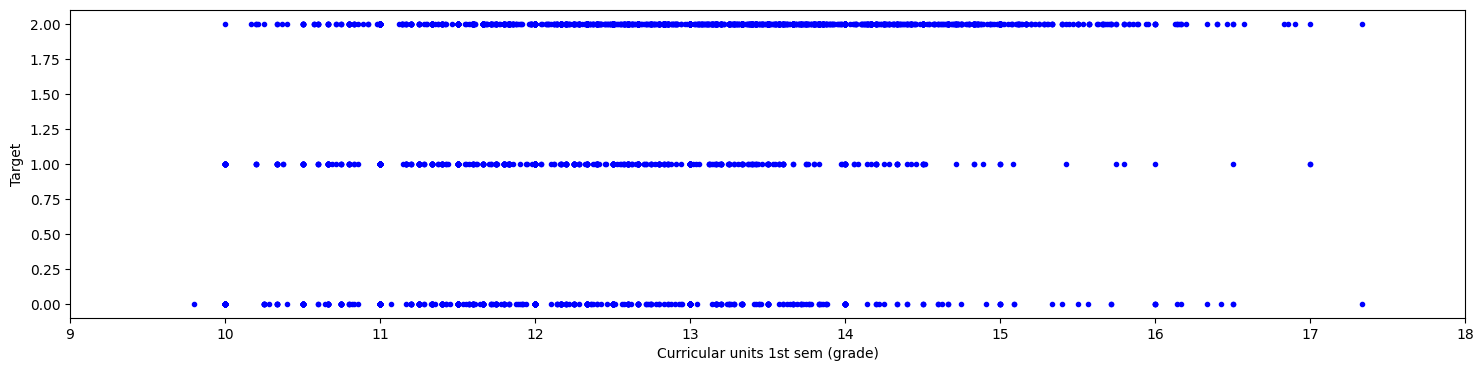

In [153]:
plt.figure(figsize=(18, 4))
plt.plot(new, y_train, "b.")
plt.xlim(9, 18)
plt.xlabel("Curricular units 1st sem (grade)")
plt.ylabel("Target")



plt.show()

Well, linear regression obviously won't work.